In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import tensorflow
from tensorflow.keras.optimizers import Adam
print(keras.__version__)
print(tensorflow.__version__)

2.5.0
2.5.0


In [10]:
train_data_path=r'C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\dataset-20210603T025532Z-001\dataset\train'
vaid_data_path=r'C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\dataset-20210603T025532Z-001\dataset\valid'

In [6]:
import matplotlib.pyplot as plt

In [7]:
# show agumented images
def Plot_image(imag_arr):
  fig, axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(imag_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


In [8]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,width_shift_range=0.2,
                                    height_shift_range=0.2, shear_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [11]:
training_data=training_datagen.flow_from_directory(train_data_path,target_size=(200,200),batch_size=128,class_mode='binary')

Found 3649 images belonging to 2 classes.


In [12]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [13]:
valid_datgen=ImageDataGenerator(rescale=1./255)
valid_data=valid_datgen.flow_from_directory(vaid_data_path,target_size=(200,200),batch_size=128,class_mode='binary')

Found 806 images belonging to 2 classes.


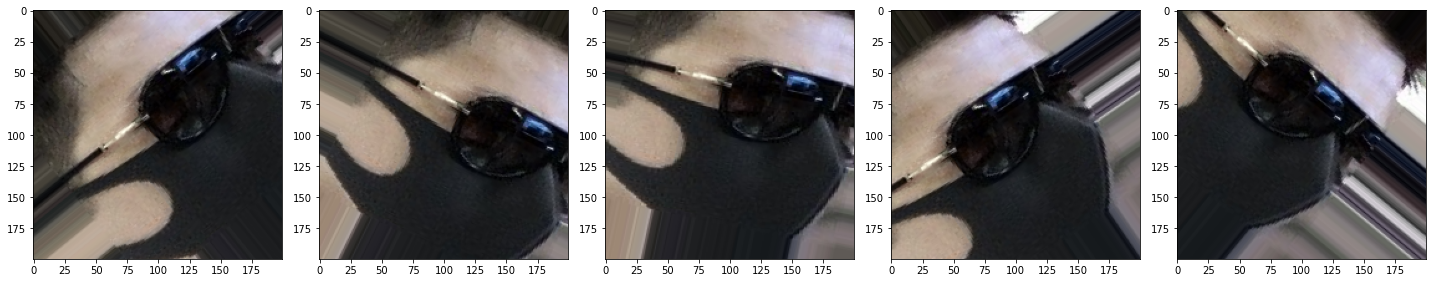

In [14]:
#showing agumented Images
images=[training_data[0][0][0] for i in range(6)]
Plot_image(images)

In [15]:
model_path=r'C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\model\model.h5'
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callback_list=[checkpoint]

In [16]:
# Building a CNN model
cnn_model=keras.models.Sequential([keras.layers.Conv2D(filters=32,kernel_size=5,input_shape=[200,200,3]),
                                   keras.layers.MaxPooling2D(pool_size=(4,4)),
                                   keras.layers.Conv2D(filters=64,kernel_size=4),
                                   keras.layers.MaxPooling2D(pool_size=(3,3)),
                                   keras.layers.Conv2D(filters=128,kernel_size=3),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=256,kernel_size=2),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Flatten(),
                                   keras.layers.Dense(units=128, activation='relu'),
                                   keras.layers.Dropout(0.1),
                                   keras.layers.Dense(units=256,activation='relu'),
                                   keras.layers.Dropout(0.25),
                                   keras.layers.Dense(units=2,activation='softmax')])

In [23]:
cnn_model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=cnn_model.fit(training_data,epochs=100,verbose=1,validation_data=valid_data, callbacks=callback_list)

Epoch 1/100


C:\Users\hmisa\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 84s 2s/step - loss: 0.5947 - accuracy: 0.6576 - val_loss: 0.3084 - val_accuracy: 0.8722

Epoch 00001: val_accuracy improved from -inf to 0.87221, saving model to C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\model\model.h5
Epoch 2/100
29/29 [==============================] - 70s 2s/step - loss: 0.3852 - accuracy: 0.8378 - val_loss: 0.1823 - val_accuracy: 0.9355

Epoch 00002: val_accuracy improved from 0.87221 to 0.93548, saving model to C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\model\model.h5
Epoch 3/100
29/29 [==============================] - 69s 2s/step - loss: 0.3296 - accuracy: 0.8936 - val_loss: 0.1638 - val_accuracy: 0.9429

Epoch 00003: val_accuracy improved from 0.93548 to 0.94293, saving model to C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\model\model.h5
Epoch 4/100
29/29 [==============================] - 69s 2s/step - loss: 0.2576 - accuracy:

29/29 [==============================] - 70s 2s/step - loss: 0.1234 - accuracy: 0.9544 - val_loss: 0.0692 - val_accuracy: 0.9739

Epoch 00038: val_accuracy did not improve from 0.98139
Epoch 39/100
29/29 [==============================] - 70s 2s/step - loss: 0.1187 - accuracy: 0.9626 - val_loss: 0.0582 - val_accuracy: 0.9801

Epoch 00039: val_accuracy did not improve from 0.98139
Epoch 40/100
29/29 [==============================] - 71s 2s/step - loss: 0.1182 - accuracy: 0.9601 - val_loss: 0.0593 - val_accuracy: 0.9777

Epoch 00040: val_accuracy did not improve from 0.98139
Epoch 41/100
29/29 [==============================] - 70s 2s/step - loss: 0.1282 - accuracy: 0.9565 - val_loss: 0.0576 - val_accuracy: 0.9826

Epoch 00041: val_accuracy improved from 0.98139 to 0.98263, saving model to C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\model\model.h5
Epoch 42/100
29/29 [==============================] - 71s 2s/step - loss: 0.0984 - accuracy: 0.9610 - val_loss


Epoch 00075: val_accuracy improved from 0.99256 to 0.99380, saving model to C:\\Users\hmisa\Desktop\Machine learning\Face Mask Detection Live Projects\model\model.h5
Epoch 76/100
29/29 [==============================] - 69s 2s/step - loss: 0.0933 - accuracy: 0.9686 - val_loss: 0.0406 - val_accuracy: 0.9888

Epoch 00076: val_accuracy did not improve from 0.99380
Epoch 77/100
29/29 [==============================] - 75s 3s/step - loss: 0.0836 - accuracy: 0.9732 - val_loss: 0.0346 - val_accuracy: 0.9926

Epoch 00077: val_accuracy did not improve from 0.99380
Epoch 78/100
29/29 [==============================] - 81s 3s/step - loss: 0.0866 - accuracy: 0.9657 - val_loss: 0.0444 - val_accuracy: 0.9864

Epoch 00078: val_accuracy did not improve from 0.99380
Epoch 79/100
29/29 [==============================] - 70s 2s/step - loss: 0.0961 - accuracy: 0.9640 - val_loss: 0.0291 - val_accuracy: 0.9913

Epoch 00079: val_accuracy did not improve from 0.99380
Epoch 80/100
29/29 [=====================